In [1]:
# Datagen inspo taken from 
# https://colab.research.google.com/github/reiinakano/invariant-risk-minimization/blob/master/invariant_risk_minimization_colored_mnist.ipynb#scrollTo=sopHPgEhu4Jo

%matplotlib ipympl
# %matplotlib notebook
import os

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import datasets
import torchvision.datasets.utils as dataset_utils

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics import Accuracy, AUROC
import time
import torch.nn.functional as F

import random

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import minmax_scale

import pickle 
import seaborn as sns

import scipy
from skimage.util import random_noise

SEED = 1234
DEVICE = 'cpu'
np.random.seed(SEED)
torch.manual_seed(SEED)

In [29]:
data_path = './data/'
if not os.path.exists(data_path):
    os.makedirs(data_path)
data = datasets.VOCSegmentation(data_path, year='2012', image_set='train', download=False) # change download=True to download and extract the PascalVOC dataset

# data_detection = datasets.VOCDetection(data_path, year='2012', image_set='trainval', download=False) # seems to not be in the same order as the segmentation dataset? just has bounding box info

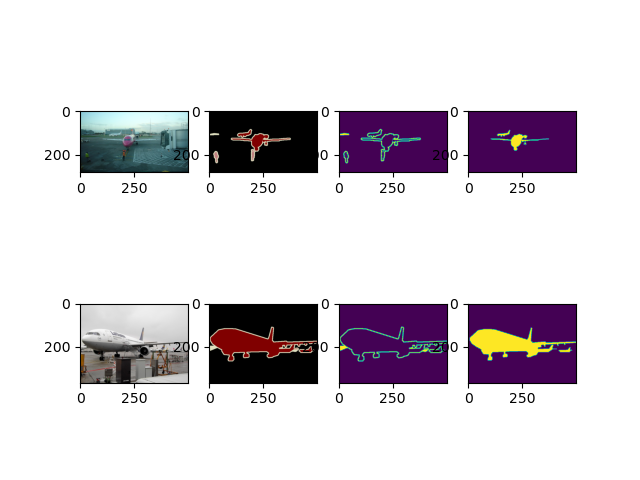

In [8]:
%matplotlib ipympl

fig, axs = plt.subplots(2,4)
axs[0,0].imshow(data[0][0])
axs[0,1].imshow(data[0][1])

arr = np.array(data[0][1])
arr[arr!=1] = 0
axs[0,2].imshow(np.array(data[0][1]))
axs[0,3].imshow(arr)

axs[1,0].imshow(data[1][0])
axs[1,1].imshow(data[1][1])
arr = np.array(data[1][1])
arr[arr!=1] = 0
axs[1,2].imshow(np.array(data[1][1]))
axs[1,3].imshow(arr)

plt.show()

In [14]:
arr = np.array(data[0][1])

In [17]:
arr[(arr!=0) & (arr!=255)]

array([ 1,  1,  1, ..., 15, 15, 15], dtype=uint8)

In [25]:
np.bincount(arr.reshape(-1,)).argmax()+1

1

In [30]:
n = 0
for sample, seg in data:
    n += 1

print(n)

1464
